### Import Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import math
from sklearn.model_selection import train_test_split

### Read Data and Seperate the Features&Target vaiables

In [2]:
df = pd.read_csv('heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [3]:
X = df.drop([df.columns[-1]], axis = 1)
y = df[df.columns[-1]]

### Listing the Categorical and Continuous Features

In [4]:
X_features_cont = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
X_features_cat = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

### Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_size = X_train.shape[0]
num_feats = X_train.shape[1]
print(train_size, num_feats)

734 11


To calculate the likelihood of categorical and continuous features seperately I have further divided the training and test data into categorical and continuous dataframe as shown below

In [6]:
X_train_cat = X_train[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']]
X_train_cat

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
795,M,NAP,Normal,N,Down
25,M,NAP,Normal,N,Up
84,M,ASY,Normal,Y,Flat
10,F,NAP,Normal,N,Up
344,M,ASY,Normal,N,Flat
...,...,...,...,...,...
106,F,ASY,ST,N,Up
270,M,ASY,Normal,N,Up
860,M,ASY,Normal,Y,Up
435,M,ASY,ST,Y,Up


In [7]:
X_test_cat = X_test[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']]
X_test_cat

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
668,F,ATA,Normal,N,Up
30,M,NAP,Normal,N,Flat
377,M,ASY,ST,N,Flat
535,M,ASY,LVH,Y,Flat
807,M,ATA,Normal,N,Up
...,...,...,...,...,...
211,F,NAP,Normal,Y,Flat
745,F,ASY,Normal,Y,Flat
584,M,ASY,ST,Y,Flat
878,M,ATA,Normal,N,Up


In [8]:
X_train_cont = X_train[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']]
X_train_cont

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
795,42,120,240,1,194,0.8
25,36,130,209,0,178,0.0
84,56,150,213,1,125,1.0
10,37,130,211,0,142,0.0
344,51,120,0,1,104,0.0
...,...,...,...,...,...,...
106,48,120,254,0,110,0.0
270,45,120,225,0,140,0.0
860,60,130,253,0,144,1.4
435,60,152,0,0,118,0.0


In [9]:
X_test_cont = X_test[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']]
X_test_cont

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
668,63,140,195,0,179,0.0
30,53,145,518,0,130,0.0
377,65,160,0,1,122,1.2
535,56,130,0,0,122,1.0
807,54,108,309,0,156,0.0
...,...,...,...,...,...,...
211,50,140,288,0,140,0.0
745,63,108,269,0,169,1.8
584,64,141,244,1,116,1.5
878,49,130,266,0,171,0.6


Creating Dictionaries for the categorical and continuous likelihoods and the prior probability

In [10]:
likelihoods2 = {}
likelihoods1 = {}
class_priors = {}

In [11]:
#Initialization of the likelihood dictionaries and the prior probability
for feature1 in X_features_cont:
    likelihoods1[feature1] = {}
    for outcome in np.unique(y_train):
        likelihoods1[feature1].update({outcome:{}})
        class_priors.update({outcome: 0})

In [12]:
for feature2 in X_features_cat:
    likelihoods2[feature2] = {}
    for outcome in np.unique(y_train):
        likelihoods2[feature2].update({outcome:{}})

In [13]:
class_priors

{0: 0, 1: 0}

In [14]:
likelihoods2

{'Sex': {0: {}, 1: {}},
 'ChestPainType': {0: {}, 1: {}},
 'RestingECG': {0: {}, 1: {}},
 'ExerciseAngina': {0: {}, 1: {}},
 'ST_Slope': {0: {}, 1: {}}}

In [15]:
likelihoods1

{'Age': {0: {}, 1: {}},
 'RestingBP': {0: {}, 1: {}},
 'Cholesterol': {0: {}, 1: {}},
 'FastingBS': {0: {}, 1: {}},
 'MaxHR': {0: {}, 1: {}},
 'Oldpeak': {0: {}, 1: {}}}

#### P(c) - Prior Class Probability 

In [16]:
for outcome in np.unique(y_train):
    outcome_count = sum(y_train == outcome)
    class_priors[outcome] = outcome_count / train_size
print(class_priors)  #{0: 0.4536784741144414, 1: 0.5463215258855586}

{0: 0.4536784741144414, 1: 0.5463215258855586}


#### P(x|c) - Likelihood2 (Categorical features)

In [17]:
for feature in X_features_cat:
    for outcome in np.unique(y_train):
        outcome_count = sum(y_train == outcome)
        feat_likelihood = X_train[feature][y_train[y_train == outcome].index.values.tolist()].value_counts().to_dict()
        #print(feat_likelihood)
        for feat_val, count in feat_likelihood.items():
            likelihoods2[feature][outcome][feat_val] = count/outcome_count

In [18]:
likelihoods2

{'Sex': {0: {'M': 0.6276276276276276, 'F': 0.37237237237237236},
  1: {'M': 0.8952618453865336, 'F': 0.10473815461346633}},
 'ChestPainType': {0: {'ATA': 0.36036036036036034,
   'NAP': 0.30930930930930933,
   'ASY': 0.27627627627627627,
   'TA': 0.05405405405405406},
  1: {'ASY': 0.770573566084788,
   'NAP': 0.14713216957605985,
   'ATA': 0.04738154613466334,
   'TA': 0.034912718204488775}},
 'RestingECG': {0: {'Normal': 0.6546546546546547,
   'LVH': 0.19519519519519518,
   'ST': 0.15015015015015015},
  1: {'Normal': 0.5635910224438903,
   'ST': 0.22693266832917705,
   'LVH': 0.20947630922693267}},
 'ExerciseAngina': {0: {'N': 0.8708708708708709, 'Y': 0.12912912912912913},
  1: {'Y': 0.6483790523690773, 'N': 0.3516209476309227}},
 'ST_Slope': {0: {'Up': 0.7597597597597597,
   'Flat': 0.2072072072072072,
   'Down': 0.03303303303303303},
  1: {'Flat': 0.773067331670823,
   'Up': 0.13466334164588528,
   'Down': 0.09226932668329177}}}

#### P(x|c) - Likelihoods1(Continuous features)

In [19]:
for feature in X_features_cont:
    for outcome in np.unique(y_train):
        likelihoods1[feature][outcome]['mean'] = X_train_cont[feature][y_train[y_train == outcome].index.values.tolist()].mean()
        likelihoods1[feature][outcome]['variance'] = X_train_cont[feature][y_train[y_train == outcome].index.values.tolist()].var()
        print(likelihoods1)

{'Age': {0: {'mean': 50.57657657657658, 'variance': 86.19065450993159}, 1: {}}, 'RestingBP': {0: {}, 1: {}}, 'Cholesterol': {0: {}, 1: {}}, 'FastingBS': {0: {}, 1: {}}, 'MaxHR': {0: {}, 1: {}}, 'Oldpeak': {0: {}, 1: {}}}
{'Age': {0: {'mean': 50.57657657657658, 'variance': 86.19065450993159}, 1: {'mean': 56.204488778054866, 'variance': 74.74807980049876}}, 'RestingBP': {0: {}, 1: {}}, 'Cholesterol': {0: {}, 1: {}}, 'FastingBS': {0: {}, 1: {}}, 'MaxHR': {0: {}, 1: {}}, 'Oldpeak': {0: {}, 1: {}}}
{'Age': {0: {'mean': 50.57657657657658, 'variance': 86.19065450993159}, 1: {'mean': 56.204488778054866, 'variance': 74.74807980049876}}, 'RestingBP': {0: {'mean': 130.26126126126127, 'variance': 274.1273200911755}, 1: {}}, 'Cholesterol': {0: {}, 1: {}}, 'FastingBS': {0: {}, 1: {}}, 'MaxHR': {0: {}, 1: {}}, 'Oldpeak': {0: {}, 1: {}}}
{'Age': {0: {'mean': 50.57657657657658, 'variance': 86.19065450993159}, 1: {'mean': 56.204488778054866, 'variance': 74.74807980049876}}, 'RestingBP': {0: {'mean': 130

#### Display of the likelihoods in a panda dataframe

In [20]:
pd.DataFrame.from_dict(likelihoods1)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,"{'mean': 50.57657657657658, 'variance': 86.190...","{'mean': 130.26126126126127, 'variance': 274.1...","{'mean': 229.57657657657657, 'variance': 5308....","{'mean': 0.10810810810810811, 'variance': 0.09...","{'mean': 147.6966966966967, 'variance': 520.72...","{'mean': 0.4030030030030028, 'variance': 0.464..."
1,"{'mean': 56.204488778054866, 'variance': 74.74...","{'mean': 135.39152119700748, 'variance': 383.5...","{'mean': 174.86034912718205, 'variance': 15692...","{'mean': 0.3266832917705736, 'variance': 0.220...","{'mean': 126.61346633416458, 'variance': 541.3...","{'mean': 1.3219451371571067, 'variance': 1.379..."


In [21]:
pd.DataFrame.from_dict(likelihoods2)

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,"{'M': 0.6276276276276276, 'F': 0.3723723723723...","{'ATA': 0.36036036036036034, 'NAP': 0.30930930...","{'Normal': 0.6546546546546547, 'LVH': 0.195195...","{'N': 0.8708708708708709, 'Y': 0.1291291291291...","{'Up': 0.7597597597597597, 'Flat': 0.207207207..."
1,"{'M': 0.8952618453865336, 'F': 0.1047381546134...","{'ASY': 0.770573566084788, 'NAP': 0.1471321695...","{'Normal': 0.5635910224438903, 'ST': 0.2269326...","{'Y': 0.6483790523690773, 'N': 0.3516209476309...","{'Flat': 0.773067331670823, 'Up': 0.1346633416..."


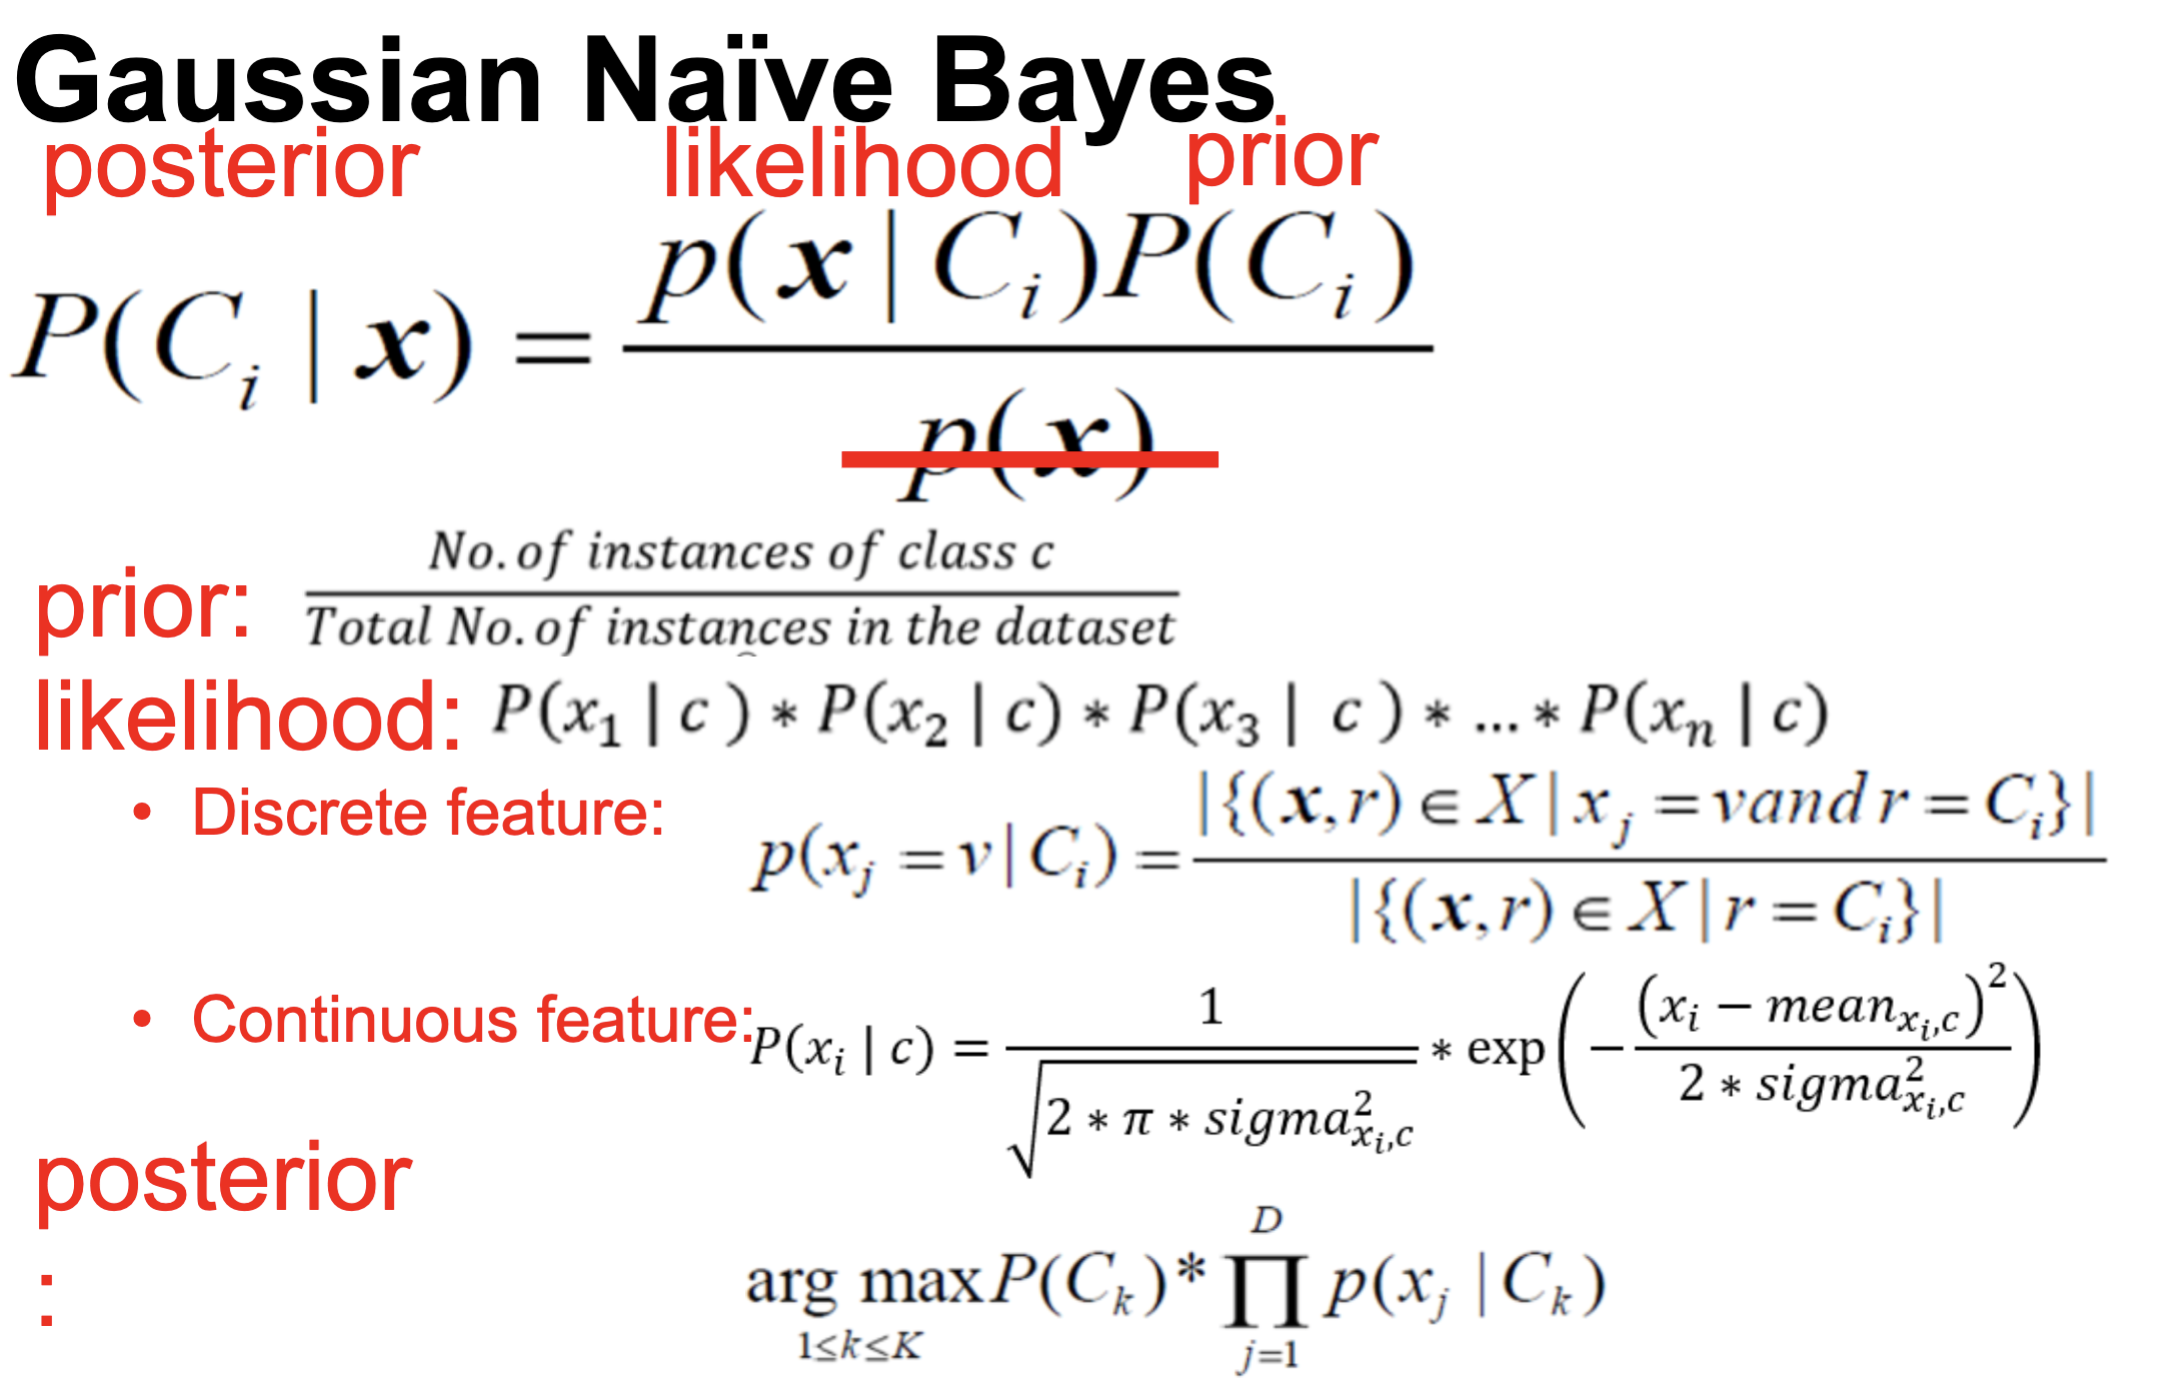

### Calculation of Posterior Probability and Prediction for Test Data

In [23]:
y_pred = []      # empty list to collect the predicted y values for all the X_test               
test_cont = np.array(X_test_cont)   #converting the X_test (both categorical and continuous into numpy arrays)
test_cat = np.array(X_test_cat)

In [24]:
for query_cont, query_cat in zip(test_cont, test_cat):
    probs_outcome = {}
    for outcome in np.unique(y_train):
        prior = class_priors[outcome]
        likelihood = 1
        evidence_temp = 1

        for feat_cont, feat_val_cont, feat_cat, feat_val_cat in zip(X_features_cont, query_cont, X_features_cat, query_cat):
            mean = likelihoods1[feat_cont][outcome]['mean']
            var = likelihoods1[feat_cont][outcome]['variance']
            #multiplying the likelihoods of the categorical features with the likelihood of continuous features
            likelihood *= ((1/math.sqrt(2*math.pi*var)) * np.exp(-(feat_val_cont - mean)**2 / (2*var)))*likelihoods2[feat_cat][outcome][feat_val_cat]

        posterior_numerator = (likelihood * prior)   # the final posterior probability
        probs_outcome[outcome] = posterior_numerator


    pred = max(probs_outcome, key = lambda x: probs_outcome[x])
    y_pred.append(pred)

print(y_pred)

[0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1]


In [25]:
len(y_pred)

184

In [26]:
type(y_pred)

list

In [27]:
type(y_test)

pandas.core.series.Series

In [28]:
y_test

668    0
30     1
377    1
535    1
807    0
      ..
211    1
745    1
584    1
878    0
451    1
Name: HeartDisease, Length: 184, dtype: int64

In [29]:
y_pred_numpy = np.array(y_pred)

In [30]:
y_test_numpy = y_test.to_numpy()

In [31]:
type(y_test_numpy)

numpy.ndarray

In [32]:
type(y_pred_numpy)

numpy.ndarray

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

print("Confusion Matrix: \n",confusion_matrix(y_test_numpy, y_pred_numpy)) #[[68  9] [16 91]]
print("The F1 Score is: ",f1_score(y_test_numpy, y_pred_numpy))   # F1 = 0.8792270531400966
print("The Accuracy Score is: ",accuracy_score(y_test_numpy, y_pred_numpy)) # 0.8641304347826086
print("The Precision Score is: ",precision_score(y_test_numpy, y_pred_numpy)) #0.91
print("The Recall Score is: ",recall_score(y_test_numpy, y_pred_numpy))  #0.8504672897196262

Confusion Matrix: 
 [[68  9]
 [16 91]]
The F1 Score is:  0.8792270531400966
The Accuracy Score is:  0.8641304347826086
The Precision Score is:  0.91
The Recall Score is:  0.8504672897196262


In [34]:
print(classification_report(y_test_numpy, y_pred_numpy)) 

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

